#Create the environment

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/My Drive/ESoWC

/content/drive/My Drive/ESoWC


In [4]:
import pandas as pd
import xarray as xr

import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns

#Our class
from create_dataset.make_dataset import CustomDataset

In [5]:
fn_land = 'Data/land_cover_data.nc'
fn_weather = 'Data/05_2019_weather_and_NOX_for_model.nc'
fn_conc = 'Data/totalcolConcentretations_featured.nc'
fn_traffic = 'Data/emissions_traffic_hourly_merged.nc'

#Load datasets

##Land

In [6]:
land_instance = CustomDataset(fn_land)
land_instance.get_dataset()

Opening dataset at :  Data/land_cover_data.nc
Done!


<xarray.Dataset>
Dimensions:       (latitude: 33, longitude: 33, time: 30)
Coordinates:
  * time          (time) datetime64[ns] 2019-05-01 2019-05-02 ... 2019-05-30
  * longitude     (longitude) float64 4.0 4.25 4.5 4.75 ... 11.5 11.75 12.0
  * latitude      (latitude) float64 43.0 43.25 43.5 43.75 ... 50.5 50.75 51.0
Data variables:
    height        (time, latitude, longitude) float32 ...
    built         (time, latitude, longitude) float32 ...
    NO emissions  (time, latitude, longitude) float32 ...

In [7]:
land_instance.resample("1H")
land_fixed = land_instance.get_dataset()
land_fixed = land_fixed.drop_vars('NO emissions') #They are already in the weather dataset
land_fixed = land_fixed.transpose('latitude','longitude','time')  
land_fixed

<xarray.Dataset>
Dimensions:    (latitude: 33, longitude: 33, time: 697)
Coordinates:
  * longitude  (longitude) float64 4.0 4.25 4.5 4.75 ... 11.25 11.5 11.75 12.0
  * latitude   (latitude) float64 43.0 43.25 43.5 43.75 ... 50.5 50.75 51.0
  * time       (time) datetime64[ns] 2019-05-01 ... 2019-05-30
Data variables:
    height     (latitude, longitude, time) float64 0.0 0.0 0.0 ... nan nan nan
    built      (latitude, longitude, time) float64 0.0 0.0 0.0 ... nan nan nan

##Weather

In [8]:
weather = xr.open_dataset(fn_weather)
weather

<xarray.Dataset>
Dimensions:            (latitude: 33, longitude: 33, time: 742)
Coordinates:
  * latitude           (latitude) float64 43.0 43.25 43.5 ... 50.5 50.75 51.0
  * longitude          (longitude) float64 4.0 4.25 4.5 4.75 ... 11.5 11.75 12.0
  * time               (time) datetime64[ns] 2019-05-01 ... 2019-05-31T21:00:00
Data variables: (12/18)
    EMISSIONS_2019     (latitude, longitude, time) float64 ...
    u10                (latitude, longitude, time) float64 ...
    v10                (latitude, longitude, time) float64 ...
    hcc                (latitude, longitude, time) float64 ...
    lcc                (latitude, longitude, time) float64 ...
    tcc                (latitude, longitude, time) float64 ...
    ...                 ...
    tcwv               (latitude, longitude, time) float64 ...
    tcw                (latitude, longitude, time) float64 ...
    tot_wind           (latitude, longitude, time) float64 ...
    tmp_shift_1        (latitude, longitude, time) float64 ...
    tot_wind_shift_12  (latitude, longitude, time) float64 ...
    rel_hum_shift_8    (latitude, longitude, time) float64 ...

In [9]:
#This variable is too much correlated with the tcw
weather_fixed = weather.drop_vars('tcwv')

weather_fixed = weather_fixed.transpose('latitude','longitude','time')  
weather_fixed

<xarray.Dataset>
Dimensions:            (latitude: 33, longitude: 33, time: 742)
Coordinates:
  * latitude           (latitude) float64 43.0 43.25 43.5 ... 50.5 50.75 51.0
  * longitude          (longitude) float64 4.0 4.25 4.5 4.75 ... 11.5 11.75 12.0
  * time               (time) datetime64[ns] 2019-05-01 ... 2019-05-31T21:00:00
Data variables: (12/17)
    EMISSIONS_2019     (latitude, longitude, time) float64 ...
    u10                (latitude, longitude, time) float64 ...
    v10                (latitude, longitude, time) float64 ...
    hcc                (latitude, longitude, time) float64 ...
    lcc                (latitude, longitude, time) float64 ...
    tcc                (latitude, longitude, time) float64 ...
    ...                 ...
    rel_hum            (latitude, longitude, time) float64 ...
    tcw                (latitude, longitude, time) float64 ...
    tot_wind           (latitude, longitude, time) float64 ...
    tmp_shift_1        (latitude, longitude, time) float64 ...
    tot_wind_shift_12  (latitude, longitude, time) float64 ...
    rel_hum_shift_8    (latitude, longitude, time) float64 ...

##Conc

In [10]:
conc_fidex = xr.open_dataset(fn_conc)
conc_fidex

<xarray.Dataset>
Dimensions:           (latitude: 33, longitude: 33, time: 708)
Coordinates:
  * latitude          (latitude) float64 43.0 43.25 43.5 ... 50.5 50.75 51.0
  * longitude         (longitude) float64 4.0 4.25 4.5 4.75 ... 11.5 11.75 12.0
  * time              (time) datetime64[ns] 2019-05-01T01:00:00 ... 2019-05-3...
Data variables:
    NO_tc             (latitude, longitude, time) float64 ...
    CO2_tc            (latitude, longitude, time) float64 ...
    CH4_tc            (latitude, longitude, time) float64 ...
    NO2_tc            (latitude, longitude, time) float64 ...
    CO_tc             (latitude, longitude, time) float64 ...
    O3_tc             (latitude, longitude, time) float64 ...
    NO_tc_add_trend   (latitude, longitude, time) float64 ...
    CO2_tc_add_trend  (latitude, longitude, time) float64 ...
    CH4_tc_add_trend  (latitude, longitude, time) float64 ...
    NO2_tc_add_trend  (latitude, longitude, time) float64 ...
    CO_tc_add_trend   (latitude, longitude, time) float64 ...
    O3_tc_add_trend   (latitude, longitude, time) float64 ...

##Traffic

In [11]:
traffic_instance = CustomDataset(fn_traffic)
traffic_ds= traffic_instance.get_dataset()
traffic_ds

Opening dataset at :  Data/emissions_traffic_hourly_merged.nc
Done!


<xarray.Dataset>
Dimensions:    (hour: 24, latitude: 60, longitude: 61)
Coordinates:
  * longitude  (longitude) float32 4.0 4.1 4.2 4.3 4.4 ... 9.6 9.7 9.8 9.9 10.0
  * latitude   (latitude) float32 43.05 43.15 43.25 43.35 ... 48.75 48.85 48.95
  * hour       (hour) int64 0 1 2 3 4 5 6 7 8 9 ... 15 16 17 18 19 20 21 22 23
Data variables:
    emissions  (hour, latitude, longitude) float32 ...
    traffic    (hour, latitude, longitude) float32 ...

In [12]:
traffic_ds=traffic_ds.drop_vars('emissions')
lat_bins = np.arange(43,51.25,0.25)
lon_bins = np.arange(4,12.25,0.25)
traffic_ds = traffic_ds.sortby(['latitude','longitude','hour'])  
traffic_ds = traffic_ds.interp(latitude=lat_bins, longitude=lon_bins, method="linear")
days = np.arange(1,32,1)
traffic_ds=traffic_ds.expand_dims({'Days':days})
traffic_ds

<xarray.Dataset>
Dimensions:    (Days: 31, hour: 24, latitude: 33, longitude: 33)
Coordinates:
  * Days       (Days) int64 1 2 3 4 5 6 7 8 9 10 ... 23 24 25 26 27 28 29 30 31
  * hour       (hour) int64 0 1 2 3 4 5 6 7 8 9 ... 15 16 17 18 19 20 21 22 23
  * latitude   (latitude) float64 43.0 43.25 43.5 43.75 ... 50.5 50.75 51.0
  * longitude  (longitude) float64 4.0 4.25 4.5 4.75 ... 11.25 11.5 11.75 12.0
Data variables:
    traffic    (Days, hour, latitude, longitude) float64 nan nan nan ... nan nan

In [13]:
trafic_df = traffic_ds.to_dataframe()
trafic_df = trafic_df.reset_index()
trafic_df['time'] = (pd.to_datetime(trafic_df['Days']-1,errors='ignore',
                             unit='d',origin='2019-05') +
                    pd.to_timedelta(trafic_df['hour'], unit='h'))
trafic_df=trafic_df.drop(columns=['Days', 'hour'])
trafic_df = trafic_df.set_index(['latitude','longitude','time'])
trafic_df.head()

traffic
latitude longitude time               
43.0     4.00      2019-05-01      NaN
         4.25      2019-05-01      NaN
         4.50      2019-05-01      NaN
         4.75      2019-05-01      NaN
         5.00      2019-05-01      NaN

In [14]:
traffic_fixed = trafic_df.to_xarray()
traffic_fixed = traffic_fixed.transpose('latitude','longitude','time')  
traffic_fixed

<xarray.Dataset>
Dimensions:    (latitude: 33, longitude: 33, time: 744)
Coordinates:
  * latitude   (latitude) float64 43.0 43.25 43.5 43.75 ... 50.5 50.75 51.0
  * longitude  (longitude) float64 4.0 4.25 4.5 4.75 ... 11.25 11.5 11.75 12.0
  * time       (time) datetime64[ns] 2019-05-01 ... 2019-05-31T23:00:00
Data variables:
    traffic    (latitude, longitude, time) float64 nan nan nan ... nan nan nan

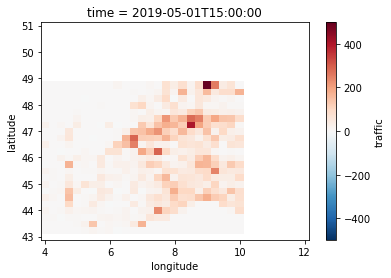

In [15]:
traffic_fixed.isel(time=[15]).traffic.plot()

#Merge

In [16]:
tot_dataset = weather_fixed.merge(land_fixed)
tot_dataset = tot_dataset.merge(conc_fidex)
tot_dataset = tot_dataset.merge(traffic_fixed)

tot_dataset

<xarray.Dataset>
Dimensions:            (latitude: 33, longitude: 33, time: 744)
Coordinates:
  * time               (time) datetime64[ns] 2019-05-01 ... 2019-05-31T23:00:00
  * latitude           (latitude) float64 43.0 43.25 43.5 ... 50.5 50.75 51.0
  * longitude          (longitude) float64 4.0 4.25 4.5 4.75 ... 11.5 11.75 12.0
Data variables: (12/32)
    EMISSIONS_2019     (latitude, longitude, time) float64 nan 1.15e-12 ... nan
    u10                (latitude, longitude, time) float64 2.632 2.961 ... nan
    v10                (latitude, longitude, time) float64 -5.72 -5.035 ... nan
    hcc                (latitude, longitude, time) float64 0.0 0.0 ... nan nan
    lcc                (latitude, longitude, time) float64 0.04311 ... nan
    tcc                (latitude, longitude, time) float64 0.04311 ... nan
    ...                 ...
    CO2_tc_add_trend   (latitude, longitude, time) float64 nan nan ... nan nan
    CH4_tc_add_trend   (latitude, longitude, time) float64 nan nan ... nan nan
    NO2_tc_add_trend   (latitude, longitude, time) float64 nan nan ... nan nan
    CO_tc_add_trend    (latitude, longitude, time) float64 nan nan ... nan nan
    O3_tc_add_trend    (latitude, longitude, time) float64 nan nan ... nan nan
    traffic            (latitude, longitude, time) float64 nan nan ... nan nan

#Check

In [17]:
weather_fixed.to_dataframe().isnull().sum()

EMISSIONS_2019       23958
u10                      0
v10                      0
hcc                      0
lcc                      0
tcc                      0
cvl                      0
cvh                      0
sp                       0
tmp                      0
sp_hum                   0
rel_hum                  0
tcw                      0
tot_wind                 0
tmp_shift_1           1089
tot_wind_shift_12    13068
rel_hum_shift_8       8712
dtype: int64

In [18]:
land_fixed.to_dataframe().isnull().sum()

height    23001
built     23001
dtype: int64

In [19]:
conc_fidex.to_dataframe().isnull().sum()

NO_tc               5
CO2_tc              5
CH4_tc              5
NO2_tc              5
CO_tc               5
O3_tc               5
NO_tc_add_trend     5
CO2_tc_add_trend    5
CH4_tc_add_trend    5
NO2_tc_add_trend    5
CO_tc_add_trend     5
O3_tc_add_trend     5
dtype: int64

In [20]:
traffic_fixed.to_dataframe().isnull().sum()

traffic    382416
dtype: int64

In [21]:
tot_dataset.to_dataframe().isnull().sum()

EMISSIONS_2019        26136
u10                    2178
v10                    2178
hcc                    2178
lcc                    2178
tcc                    2178
cvl                    2178
cvh                    2178
sp                     2178
tmp                    2178
sp_hum                 2178
rel_hum                2178
tcw                    2178
tot_wind               2178
tmp_shift_1            3267
tot_wind_shift_12     15246
rel_hum_shift_8       10890
height                74184
built                 74184
NO_tc                 39209
CO2_tc                39209
CH4_tc                39209
NO2_tc                39209
CO_tc                 39209
O3_tc                 39209
NO_tc_add_trend       39209
CO2_tc_add_trend      39209
CH4_tc_add_trend      39209
NO2_tc_add_trend      39209
CO_tc_add_trend       39209
O3_tc_add_trend       39209
traffic              382416
dtype: int64

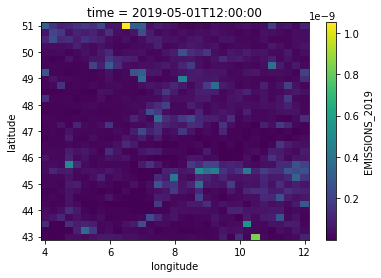

In [22]:
tot_dataset.isel(time=[12]).EMISSIONS_2019.plot()

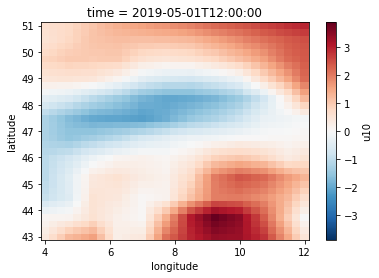

In [23]:
tot_dataset.isel(time=[12]).u10.plot()

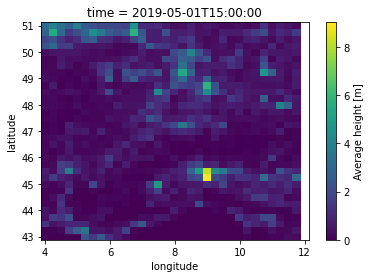

In [24]:
tot_dataset.isel(time=[15]).height.plot()

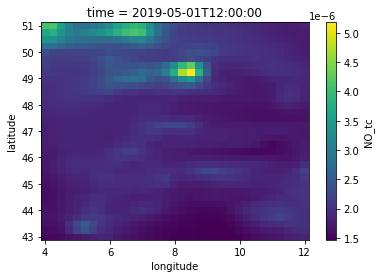

In [25]:
tot_dataset.isel(time=[12]).NO_tc.plot()

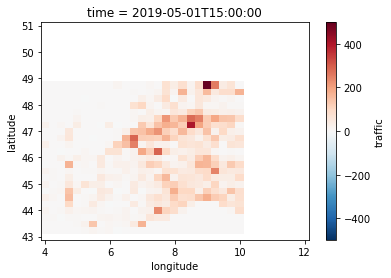

In [26]:
tot_dataset.isel(time=[15]).traffic.plot()

#Save the dataset

In [27]:
tot_dataset.to_netcdf('Data/05_2019_dataset_complete_for_model_NOX.nc', 'w', 'NETCDF4')